In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Loan_Data.csv")

Ideal FICO range: 300 to 850

In [4]:
data.fico_score.describe()

count    10000.000000
mean       637.557700
std         60.657906
min        408.000000
25%        597.000000
50%        638.000000
75%        679.000000
max        850.000000
Name: fico_score, dtype: float64

In [20]:
quantiles = {5:300, 4:500 ,3:650 ,2:750 ,1:850}

def MSEFit(scores):
    global quantiles
    category = []
    for score in scores:
        prevDiff = 1000
        cat = 0
        for key, val in quantiles.items():
            diff = np.abs(score - val)
            if(diff < prevDiff):
                prevDiff = diff
                cat = key
        category.append(cat)
    return category

In [21]:
data["category"] = MSEFit(data.fico_score)
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,category
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,3
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,4
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,3
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,3
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,3
...,...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0,3
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0,3
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0,3
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0,3


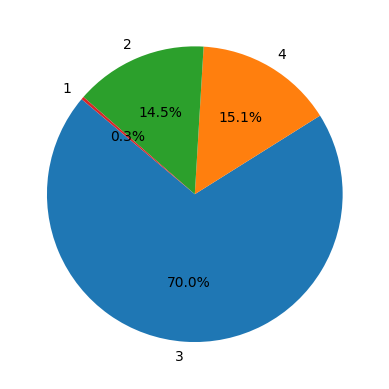

In [41]:
value_counts = data.category.value_counts()
labels = value_counts.index.tolist()
plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=140);